### Estudiante: Andrea Valencia Orozco.
#### Análisis Exploratorio de Datos.

### Cargar librerias

In [337]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import mean_squared_error
import seaborn as sns

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import FeatureUnion, Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

from sklearn.linear_model import LinearRegression

### Casos experimentales

Se analizaron tres (3) casos que emplearon datos experimentales/simulados con el fin de ilustrar la aplicación de los Pipelines.

### Caso 1

In [338]:
np.random.seed(0)
x = np.arange(1, 11) 
y = 2 * X + 1  

df = pd.DataFrame({'x': x, 'y': y})

In [339]:
df

,x,y
0,1,3
1,2,5
2,3,7
3,4,9
4,5,11
5,6,13
6,7,15
7,8,17
8,9,19
9,10,21


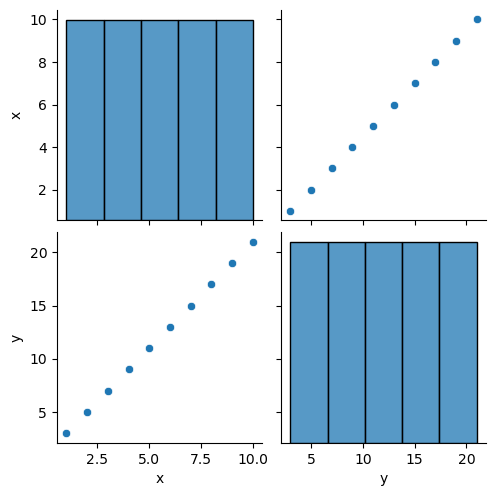

In [340]:
sns.pairplot(df)

In [341]:
train = df.iloc[:8]
test = df.iloc[8:]

train_x = train.drop('y', axis = 1)
train_y = train.y

test_x = test.drop('y', axis = 1)
test_y = test.y

In [342]:
m1 = LinearRegression()
fit1 = m1.fit(train_x, train_y)
preds = fit1.predict(test_x)
print(f'\n{preds}')
print(f'RMSE: {np.sqrt(mean_squared_error(test_y, preds))}\n')


[19. 21.]
RMSE: 0.0



In [343]:
print('crear pipeline 1')

pipe1 = Pipeline(steps=[
                        ('regresion', LinearRegression())
])

crear pipeline 1


Se aplicó una regresión lineal a un conjunto de datos que exhiben una relación perfecta. Esto se usó posteriormente desde los Pipelines.

In [344]:
print('fit 1')
pipe1.fit(train_x,train_y)

print('predichos')
preds1 = pipe1.predict(test_x)

print(f'\n{preds1}')
print(f'RMSE: {np.sqrt(mean_squared_error(test_y, preds1))}\n')

fit 1
predichos

[19. 21.]
RMSE: 0.0



### Caso 2

Ahora se hace una transformación sobre x como ejercicio nuevamente:

In [345]:
np.random.seed(0)
x = np.arange(1, 11) 
y = x**2 + 4

df = pd.DataFrame({'x': x, 'y': y})

In [346]:
df

,x,y
0,1,5
1,2,8
2,3,13
3,4,20
4,5,29
5,6,40
6,7,53
7,8,68
8,9,85
9,10,104


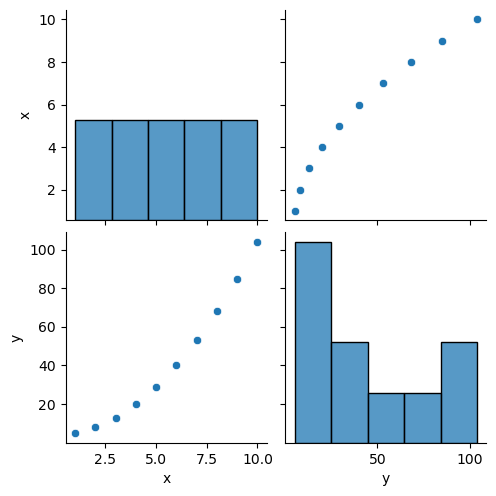

In [347]:
sns.pairplot(df)

In [348]:
train = df.iloc[:8]
test = df.iloc[8:]

train_x = train.drop('y', axis = 1)
train_y = train.y

test_x = test.drop('y', axis = 1)
test_y = test.y

In [349]:
m2 = LinearRegression()
fit2 = m2.fit(train_x, train_y)
preds2 = fit2.predict(test_x)
print(f'\n{preds}')
print(f'RMSE: {np.sqrt(mean_squared_error(test_y, preds2))}\n')


[19. 21.]
RMSE: 20.615528128088304



In [350]:
class Experimental_Transformer(BaseEstimator, TransformerMixin):
    
    def __init__(self):
        print('\n>>>>>>> init() called.\n')

    def fit(self, df, y=None):
        print('\n>>>>>>> fit() called.\n')
        return self

    def transform(self, df, y=None):
        print('\n>>>>>>> transform() called.\n')
        df_ = df.copy()
        df_['x'] = np.sqrt(df_['x']) 
        return df_

In [351]:
print('crear pipeline 2')

pipe2 = Pipeline(steps=[
                        ('experimental_trans', Experimental_Transformer()),
                        ('regresion', LinearRegression())])

crear pipeline 2

>>>>>>> init() called.



In [352]:
print('fit 2')
pipe2.fit(train_x,train_y)

print('predichos 2')
preds2 = pipe2.predict(test_x)

print(f'\n{preds2}')
print(f'RMSE: {np.sqrt(mean_squared_error(test_y, preds2))}\n')

fit 2

>>>>>>> fit() called.


>>>>>>> transform() called.

predichos 2

>>>>>>> transform() called.


[61.92144251 67.39196623]
RMSE: 30.600391766801213



### Caso 3

In [353]:
n_samples = 100
x1 = np.random.rand(n_samples)  
x2 = np.random.rand(n_samples) 
y = x1 + 2 * np.sqrt(x2)

data = {'x1': x1, 'x2': x2, 'y': y}
df = pd.DataFrame(data)

In [354]:
df

,x1,x2,y
0,0.548814,0.677817,2.195406
1,0.715189,0.270008,1.754435
2,0.602763,0.735194,2.317632
3,0.544883,0.962189,2.506707
4,0.423655,0.248753,1.421158
...,...,...,...
95,0.183191,0.490459,1.583847
96,0.586513,0.227415,1.540273
97,0.020108,0.254356,1.028783
98,0.828940,0.058029,1.310725


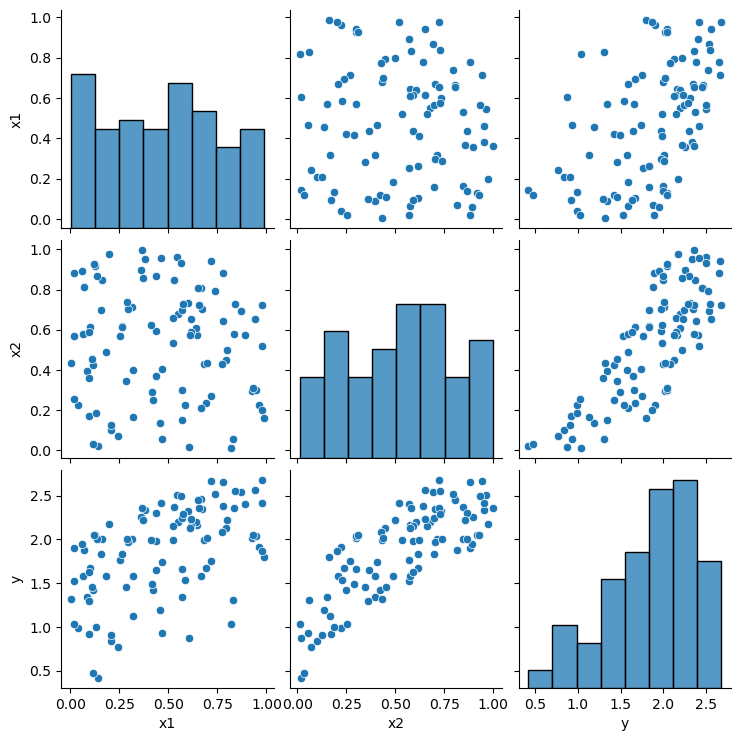

In [355]:
sns.pairplot(df)

In [356]:
train = df.iloc[:79]
test = df.iloc[79:]

train_x = train.drop('y', axis = 1)
train_y = train.y

test_x = test.drop('y', axis = 1)
test_y = test.y

In [357]:
m3 = LinearRegression()
fit3 = m2.fit(train_x, train_y)
preds3 = fit2.predict(test_x)
print(f'\n{preds}')
print(f'RMSE: {np.sqrt(mean_squared_error(test_y, preds3))}\n')


[19. 21.]
RMSE: 0.09071950016991695



In [358]:
class ExperimentalTransformer(BaseEstimator, TransformerMixin):   
    
  def __init__(self):
    print('\n>>>>>>>init() called.\n')
    
  def fit(self, X, y = None):
    print('\n>>>>>>>fit() called.\n')
    return self

  def transform(self, X, y = None):
    print('\n>>>>>>>transform() called.\n')
    X_ = X.copy()
    X_.x2 = 2 * np.sqrt(X_.x2)
    return X_

In [359]:
print("create pipeline 3")
pipe3 = Pipeline(steps=[
                       ('experimental_trans', ExperimentalTransformer()),    # esto dispara una llamda a __init__
                       ('linear_model', LinearRegression())
])


print("fit pipeline 2")
pipe3.fit(train_x, train_y)

print("predict via pipeline 2")
preds3 = pipe3.predict(test_x)

print(f"\n{preds3}")  
print(f"RMSE: {np.sqrt(mean_squared_error(test_y, preds3))}\n")

create pipeline 3

>>>>>>>init() called.

fit pipeline 2

>>>>>>>fit() called.


>>>>>>>transform() called.

predict via pipeline 2

>>>>>>>transform() called.


[0.47559705 1.12963374 1.99094102 1.58365872 1.66795727 2.49969638
 1.83250909 1.98698683 1.63005246 2.28489006 2.04633692 1.58066413
 1.58358449 0.99479961 2.65990369 2.00934888 1.58384665 1.54027313
 1.02878288 1.31072488 1.32290127]
RMSE: 2.323777252720854e-16

